In [0]:
#import of required libraries
import seaborn as sns
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
import csv
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets,linear_model, preprocessing,utils
from sklearn.metrics import mean_squared_error,r2_score
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from matplotlib.pyplot import figure, show
from keras.layers import Conv1D, Conv2D, MaxPooling2D 
import keras
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Flatten ,Dropout
import cv2
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.callbacks import EarlyStopping
from keras import optimizers
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
import glob
from keras.layers import concatenate
from keras.models import Model
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate
from IPython.display import Image
from sklearn import preprocessing

Using TensorFlow backend.


In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
data_path = "/content/gdrive/My Drive/MS/CSC 215/Project-3/Houses Dataset/"

filename_read = os.path.join(data_path, "HousesInfo.txt")

cols=["Bedrooms","Bathrooms","area","zipcode","price"]

df = pd.read_csv(filename_read , sep=" ", header=None , names=cols)

df.head()

,Bedrooms,Bathrooms,area,zipcode,price
0,4,4.0,4053,85255,869500
1,4,3.0,3343,36372,865200
2,3,4.0,3923,85266,889000
3,5,5.0,4022,85262,910000
4,3,4.0,4116,85266,971226


In [0]:
df.shape

(535, 5)

In [0]:
df.isnull().sum()

Bedrooms     0
Bathrooms    0
area         0
zipcode      0
price        0
dtype: int64

In [0]:
## Bathroom.jpg
new_images=[]
for number in range(1, 536):
    for path in glob.glob(data_path + str(number) + "_bathroom.jpg"):
        if os.path.isfile(path):
            new_images.append(path)

In [0]:
new_images

['/content/gdrive/My Drive/MS/CSC 215/Project-3/Houses Dataset/1_bathroom.jpg',
 '/content/gdrive/My Drive/MS/CSC 215/Project-3/Houses Dataset/2_bathroom.jpg',
 '/content/gdrive/My Drive/MS/CSC 215/Project-3/Houses Dataset/3_bathroom.jpg',
 '/content/gdrive/My Drive/MS/CSC 215/Project-3/Houses Dataset/4_bathroom.jpg',
 '/content/gdrive/My Drive/MS/CSC 215/Project-3/Houses Dataset/5_bathroom.jpg',
 '/content/gdrive/My Drive/MS/CSC 215/Project-3/Houses Dataset/6_bathroom.jpg',
 '/content/gdrive/My Drive/MS/CSC 215/Project-3/Houses Dataset/7_bathroom.jpg',
 '/content/gdrive/My Drive/MS/CSC 215/Project-3/Houses Dataset/8_bathroom.jpg',
 '/content/gdrive/My Drive/MS/CSC 215/Project-3/Houses Dataset/9_bathroom.jpg',
 '/content/gdrive/My Drive/MS/CSC 215/Project-3/Houses Dataset/10_bathroom.jpg',
 '/content/gdrive/My Drive/MS/CSC 215/Project-3/Houses Dataset/11_bathroom.jpg',
 '/content/gdrive/My Drive/MS/CSC 215/Project-3/Houses Dataset/12_bathroom.jpg',
 '/content/gdrive/My Drive/MS/CSC 215

In [0]:
img= pd.DataFrame(new_images,columns = ['bathroom_img'])

In [0]:
## bedroom images
bedroom_images = []
for number in range(1, 536):
    for path in glob.glob(data_path + str(number) + "_bedroom.jpg"):
        if os.path.isfile(path):
            bedroom_images.append(path) 
            
img['bedroom_img']=bedroom_images            

In [0]:
frontal_images = []
for number in range(1, 536):
    for path in glob.glob(data_path + str(number) + "_frontal.jpg"):
        if os.path.isfile(path):
            frontal_images.append(path) 
            
img['frontal_img']=frontal_images            

In [0]:
kitchen_images = []
for number in range(1, 536):
    for path in glob.glob(data_path + str(number) + "_kitchen.jpg"):
        if os.path.isfile(path):
            kitchen_images.append(path) 
            
img['kitchen_img']=kitchen_images            

In [0]:
img.head()

,bathroom_img,bedroom_img,frontal_img,kitchen_img
0,/content/gdrive/My Drive/MS/CSC 215/Project-3/...,/content/gdrive/My Drive/MS/CSC 215/Project-3/...,/content/gdrive/My Drive/MS/CSC 215/Project-3/...,/content/gdrive/My Drive/MS/CSC 215/Project-3/...
1,/content/gdrive/My Drive/MS/CSC 215/Project-3/...,/content/gdrive/My Drive/MS/CSC 215/Project-3/...,/content/gdrive/My Drive/MS/CSC 215/Project-3/...,/content/gdrive/My Drive/MS/CSC 215/Project-3/...
2,/content/gdrive/My Drive/MS/CSC 215/Project-3/...,/content/gdrive/My Drive/MS/CSC 215/Project-3/...,/content/gdrive/My Drive/MS/CSC 215/Project-3/...,/content/gdrive/My Drive/MS/CSC 215/Project-3/...
3,/content/gdrive/My Drive/MS/CSC 215/Project-3/...,/content/gdrive/My Drive/MS/CSC 215/Project-3/...,/content/gdrive/My Drive/MS/CSC 215/Project-3/...,/content/gdrive/My Drive/MS/CSC 215/Project-3/...
4,/content/gdrive/My Drive/MS/CSC 215/Project-3/...,/content/gdrive/My Drive/MS/CSC 215/Project-3/...,/content/gdrive/My Drive/MS/CSC 215/Project-3/...,/content/gdrive/My Drive/MS/CSC 215/Project-3/...


In [0]:
img.shape

(535, 4)

In [0]:
result = pd.concat([df, img], axis=1, sort=False)

In [0]:
result.head()

,Bedrooms,Bathrooms,area,zipcode,price,bathroom_img,bedroom_img,frontal_img,kitchen_img
0,4,4.0,4053,85255,869500,/content/gdrive/My Drive/MS/CSC 215/Project-3/...,/content/gdrive/My Drive/MS/CSC 215/Project-3/...,/content/gdrive/My Drive/MS/CSC 215/Project-3/...,/content/gdrive/My Drive/MS/CSC 215/Project-3/...
1,4,3.0,3343,36372,865200,/content/gdrive/My Drive/MS/CSC 215/Project-3/...,/content/gdrive/My Drive/MS/CSC 215/Project-3/...,/content/gdrive/My Drive/MS/CSC 215/Project-3/...,/content/gdrive/My Drive/MS/CSC 215/Project-3/...
2,3,4.0,3923,85266,889000,/content/gdrive/My Drive/MS/CSC 215/Project-3/...,/content/gdrive/My Drive/MS/CSC 215/Project-3/...,/content/gdrive/My Drive/MS/CSC 215/Project-3/...,/content/gdrive/My Drive/MS/CSC 215/Project-3/...
3,5,5.0,4022,85262,910000,/content/gdrive/My Drive/MS/CSC 215/Project-3/...,/content/gdrive/My Drive/MS/CSC 215/Project-3/...,/content/gdrive/My Drive/MS/CSC 215/Project-3/...,/content/gdrive/My Drive/MS/CSC 215/Project-3/...
4,3,4.0,4116,85266,971226,/content/gdrive/My Drive/MS/CSC 215/Project-3/...,/content/gdrive/My Drive/MS/CSC 215/Project-3/...,/content/gdrive/My Drive/MS/CSC 215/Project-3/...,/content/gdrive/My Drive/MS/CSC 215/Project-3/...


In [0]:
rslt_df = result[result['price'] >=50000] 
rslt_df = rslt_df[rslt_df['price'] <=900000] 

rslt_df

,Bedrooms,Bathrooms,area,zipcode,price,bathroom_img,bedroom_img,frontal_img,kitchen_img
0,4,4.0,4053,85255,869500,/content/gdrive/My Drive/MS/CSC 215/Project-3/...,/content/gdrive/My Drive/MS/CSC 215/Project-3/...,/content/gdrive/My Drive/MS/CSC 215/Project-3/...,/content/gdrive/My Drive/MS/CSC 215/Project-3/...
1,4,3.0,3343,36372,865200,/content/gdrive/My Drive/MS/CSC 215/Project-3/...,/content/gdrive/My Drive/MS/CSC 215/Project-3/...,/content/gdrive/My Drive/MS/CSC 215/Project-3/...,/content/gdrive/My Drive/MS/CSC 215/Project-3/...
2,3,4.0,3923,85266,889000,/content/gdrive/My Drive/MS/CSC 215/Project-3/...,/content/gdrive/My Drive/MS/CSC 215/Project-3/...,/content/gdrive/My Drive/MS/CSC 215/Project-3/...,/content/gdrive/My Drive/MS/CSC 215/Project-3/...
6,3,4.0,2544,85262,799000,/content/gdrive/My Drive/MS/CSC 215/Project-3/...,/content/gdrive/My Drive/MS/CSC 215/Project-3/...,/content/gdrive/My Drive/MS/CSC 215/Project-3/...,/content/gdrive/My Drive/MS/CSC 215/Project-3/...
10,5,5.0,4829,85266,519200,/content/gdrive/My Drive/MS/CSC 215/Project-3/...,/content/gdrive/My Drive/MS/CSC 215/Project-3/...,/content/gdrive/My Drive/MS/CSC 215/Project-3/...,/content/gdrive/My Drive/MS/CSC 215/Project-3/...
...,...,...,...,...,...,...,...,...,...
530,5,2.0,2066,94531,399900,/content/gdrive/My Drive/MS/CSC 215/Project-3/...,/content/gdrive/My Drive/MS/CSC 215/Project-3/...,/content/gdrive/My Drive/MS/CSC 215/Project-3/...,/content/gdrive/My Drive/MS/CSC 215/Project-3/...
531,4,3.5,9536,94531,460000,/content/gdrive/My Drive/MS/CSC 215/Project-3/...,/content/gdrive/My Drive/MS/CSC 215/Project-3/...,/content/gdrive/My Drive/MS/CSC 215/Project-3/...,/content/gdrive/My Drive/MS/CSC 215/Project-3/...
532,3,2.0,2014,94531,407000,/content/gdrive/My Drive/MS/CSC 215/Project-3/...,/content/gdrive/My Drive/MS/CSC 215/Project-3/...,/content/gdrive/My Drive/MS/CSC 215/Project-3/...,/content/gdrive/My Drive/MS/CSC 215/Project-3/...
533,4,3.0,2312,94531,419000,/content/gdrive/My Drive/MS/CSC 215/Project-3/...,/content/gdrive/My Drive/MS/CSC 215/Project-3/...,/content/gdrive/My Drive/MS/CSC 215/Project-3/...,/content/gdrive/My Drive/MS/CSC 215/Project-3/...


In [0]:

img = rslt_df.drop(columns =['Bedrooms',	'Bathrooms',	'area',	'zipcode',	'price'], inplace = False) 
img.head()

,bathroom_img,bedroom_img,frontal_img,kitchen_img
0,/content/gdrive/My Drive/MS/CSC 215/Project-3/...,/content/gdrive/My Drive/MS/CSC 215/Project-3/...,/content/gdrive/My Drive/MS/CSC 215/Project-3/...,/content/gdrive/My Drive/MS/CSC 215/Project-3/...
1,/content/gdrive/My Drive/MS/CSC 215/Project-3/...,/content/gdrive/My Drive/MS/CSC 215/Project-3/...,/content/gdrive/My Drive/MS/CSC 215/Project-3/...,/content/gdrive/My Drive/MS/CSC 215/Project-3/...
2,/content/gdrive/My Drive/MS/CSC 215/Project-3/...,/content/gdrive/My Drive/MS/CSC 215/Project-3/...,/content/gdrive/My Drive/MS/CSC 215/Project-3/...,/content/gdrive/My Drive/MS/CSC 215/Project-3/...
6,/content/gdrive/My Drive/MS/CSC 215/Project-3/...,/content/gdrive/My Drive/MS/CSC 215/Project-3/...,/content/gdrive/My Drive/MS/CSC 215/Project-3/...,/content/gdrive/My Drive/MS/CSC 215/Project-3/...
10,/content/gdrive/My Drive/MS/CSC 215/Project-3/...,/content/gdrive/My Drive/MS/CSC 215/Project-3/...,/content/gdrive/My Drive/MS/CSC 215/Project-3/...,/content/gdrive/My Drive/MS/CSC 215/Project-3/...


In [0]:
text = rslt_df.drop(columns =['bathroom_img','bedroom_img','frontal_img','kitchen_img'], inplace = False)
text.head()

,Bedrooms,Bathrooms,area,zipcode,price
0,4,4.0,4053,85255,869500
1,4,3.0,3343,36372,865200
2,3,4.0,3923,85266,889000
6,3,4.0,2544,85262,799000
10,5,5.0,4829,85266,519200


In [0]:
images_output=[]
for row_index,row in img.iterrows():
            inputImages=[]
            outputImage = np.zeros((128, 128, 3), dtype="uint8")
            image_temp1 = cv2.imread(row.bathroom_img)
            image1 = cv2.resize(image_temp1, (64 , 64))
            
            image_temp2 = cv2.imread(row.bedroom_img)
            image2 = cv2.resize(image_temp2, (64 , 64))
            
            image_temp3 = cv2.imread(row.frontal_img)
            image3 = cv2.resize(image_temp3, (64 , 64))
            
            image_temp4 = cv2.imread(row.kitchen_img)
            image4 = cv2.resize(image_temp4, (64 , 64))
              
            inputImages.append(image1)
            inputImages.append(image2)
            inputImages.append(image3)
            inputImages.append(image4)
            
            outputImage[0:64, 0:64] = inputImages[0]
            outputImage[0:64, 64:128] = inputImages[1]
            outputImage[64:128, 64:128] = inputImages[2]
            outputImage[64:128, 0:64] = inputImages[3]
            
        
            images_output.append(outputImage)      

In [0]:
images_output[0]

array([[[141, 173, 192],
        [110, 143, 170],
        [ 92, 143, 172],
        ...,
        [ 89,  98, 123],
        [ 66,  50,  67],
        [ 52,  41,  63]],

       [[145, 181, 191],
        [128, 168, 187],
        [ 87, 131, 161],
        ...,
        [ 99, 104, 135],
        [ 49,  75, 104],
        [ 12,  21,  47]],

       [[100, 138, 157],
        [116, 152, 171],
        [102, 147, 175],
        ...,
        [ 23,  33,  54],
        [ 75,  94, 132],
        [ 69,  99, 132]],

       ...,

       [[156, 159, 174],
        [173, 165, 170],
        [182, 179, 189],
        ...,
        [160, 141, 138],
        [171, 152, 146],
        [138, 104,  98]],

       [[128, 135, 162],
        [187, 189, 200],
        [182, 171, 183],
        ...,
        [130, 113, 124],
        [112, 102,  88],
        [ 87,  74,  59]],

       [[188, 187, 198],
        [199, 183, 191],
        [190, 170, 175],
        ...,
        [147, 101,  96],
        [148, 110,  91],
        [156, 151, 147]]

In [0]:
images_output_ndarray = np.asarray(images_output)

In [0]:
images_output_ndarray.shape

(453, 128, 128, 3)

In [0]:
train_image = images_output_ndarray[:int(len(images_output_ndarray)*0.7)]
test_image = images_output_ndarray[int(len(images_output_ndarray)*0.7):]
len(train_image)

374

In [0]:
train_image[0]

array([[[141, 173, 192],
        [110, 143, 170],
        [ 92, 143, 172],
        ...,
        [ 89,  98, 123],
        [ 66,  50,  67],
        [ 52,  41,  63]],

       [[145, 181, 191],
        [128, 168, 187],
        [ 87, 131, 161],
        ...,
        [ 99, 104, 135],
        [ 49,  75, 104],
        [ 12,  21,  47]],

       [[100, 138, 157],
        [116, 152, 171],
        [102, 147, 175],
        ...,
        [ 23,  33,  54],
        [ 75,  94, 132],
        [ 69,  99, 132]],

       ...,

       [[156, 159, 174],
        [173, 165, 170],
        [182, 179, 189],
        ...,
        [160, 141, 138],
        [171, 152, 146],
        [138, 104,  98]],

       [[128, 135, 162],
        [187, 189, 200],
        [182, 171, 183],
        ...,
        [130, 113, 124],
        [112, 102,  88],
        [ 87,  74,  59]],

       [[188, 187, 198],
        [199, 183, 191],
        [190, 170, 175],
        ...,
        [147, 101,  96],
        [148, 110,  91],
        [156, 151, 147]]

In [0]:
df_y_cnn = text[['price']].copy()
df_x_cnn = text.drop(['price'], axis = 1)

In [0]:
df_x_nn = pd.get_dummies(df_x_cnn, columns=['zipcode'])

In [0]:
df_x_nn.head()

,Bedrooms,Bathrooms,area,zipcode_36372,zipcode_60002,zipcode_60016,zipcode_60046,zipcode_62025,zipcode_62034,zipcode_62088,zipcode_62214,zipcode_62234,zipcode_62249,zipcode_81418,zipcode_81521,zipcode_81524,zipcode_85255,zipcode_85262,zipcode_85266,zipcode_85331,zipcode_91752,zipcode_91901,zipcode_91915,zipcode_92021,zipcode_92253,zipcode_92276,zipcode_92543,zipcode_92677,zipcode_92692,zipcode_92802,zipcode_92880,zipcode_93105,zipcode_93111,zipcode_93314,zipcode_93446,zipcode_93510,zipcode_93720,zipcode_94501,zipcode_94531,zipcode_94565,zipcode_94568,zipcode_95220,zipcode_96019,zipcode_98021
0,4,4.0,4053,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,4,3.0,3343,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,4.0,3923,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,3,4.0,2544,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10,5,5.0,4829,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
def encode_numeric_zscore(df, name, mean=None, sd=None):
    if mean is None:
        mean = df[name].mean()

    if sd is None:
        sd = df[name].std()

    df[name] = (df[name] - mean) / sd
    
 
col = ["Bedrooms","Bathrooms", "area"]
for x in col:
 encode_numeric_zscore(df_x_nn,x)

In [0]:
df_x_nn.head()

,Bedrooms,Bathrooms,area,zipcode_36372,zipcode_60002,zipcode_60016,zipcode_60046,zipcode_62025,zipcode_62034,zipcode_62088,zipcode_62214,zipcode_62234,zipcode_62249,zipcode_81418,zipcode_81521,zipcode_81524,zipcode_85255,zipcode_85262,zipcode_85266,zipcode_85331,zipcode_91752,zipcode_91901,zipcode_91915,zipcode_92021,zipcode_92253,zipcode_92276,zipcode_92543,zipcode_92677,zipcode_92692,zipcode_92802,zipcode_92880,zipcode_93105,zipcode_93111,zipcode_93314,zipcode_93446,zipcode_93510,zipcode_93720,zipcode_94501,zipcode_94531,zipcode_94565,zipcode_94568,zipcode_95220,zipcode_96019,zipcode_98021
0,0.631309,1.750695,1.655049,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.631309,0.583994,1.025047,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,-0.243257,1.750695,1.539697,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,-0.243257,1.750695,0.316073,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10,1.505875,2.917395,2.343615,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
df_x_nn = df_x_nn.values
df_y_cnn = df_y_cnn.values

In [0]:
# Using Split function 
X_train_txt,X_test_txt, X_train_images, X_test_images, y_train, y_test = train_test_split(df_x_nn, images_output_ndarray, df_y_cnn, test_size=0.2, random_state=42)

In [0]:
print(X_train_txt.shape)
print(X_test_txt.shape)
print(X_train_images.shape)
print(X_test_images.shape)
print(y_train.shape)
print(y_test.shape)

(362, 44)
(91, 44)
(362, 128, 128, 3)
(91, 128, 128, 3)
(362, 1)
(91, 1)


In [0]:
from matplotlib import pyplot as plt

for i in images_output:
     plt.figure(figsize=(8,8))
     plt.imshow(i, interpolation='nearest')
     plt.show()

In [0]:
img_arr=np.asarray(images_output)

img_arr.shape

(453, 128, 128, 3)

In [0]:
train_image 

#### Functional API Keras

In [0]:
def chart_regression(pred,y,sort=True):
    t = pd.DataFrame({'pred' : pred, 'y' : y.flatten()})
    if sort:
        t.sort_values(by=['y'],inplace=True)
    a = plt.plot(t['y'].tolist(),label='expected')
    b = plt.plot(t['pred'].tolist(),label='prediction')
    plt.ylabel('output')
    plt.legend()
    plt.show()

Model: "model_21"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_42 (InputLayer)           (None, 128, 128, 3)  0                                            
__________________________________________________________________________________________________
conv2d_57 (Conv2D)              (None, 125, 125, 64) 3136        input_42[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_54 (MaxPooling2D) (None, 62, 62, 64)   0           conv2d_57[0][0]                  
__________________________________________________________________________________________________
conv2d_58 (Conv2D)              (None, 60, 60, 32)   18464       max_pooling2d_54[0][0]           
___________________________________________________________________________________________

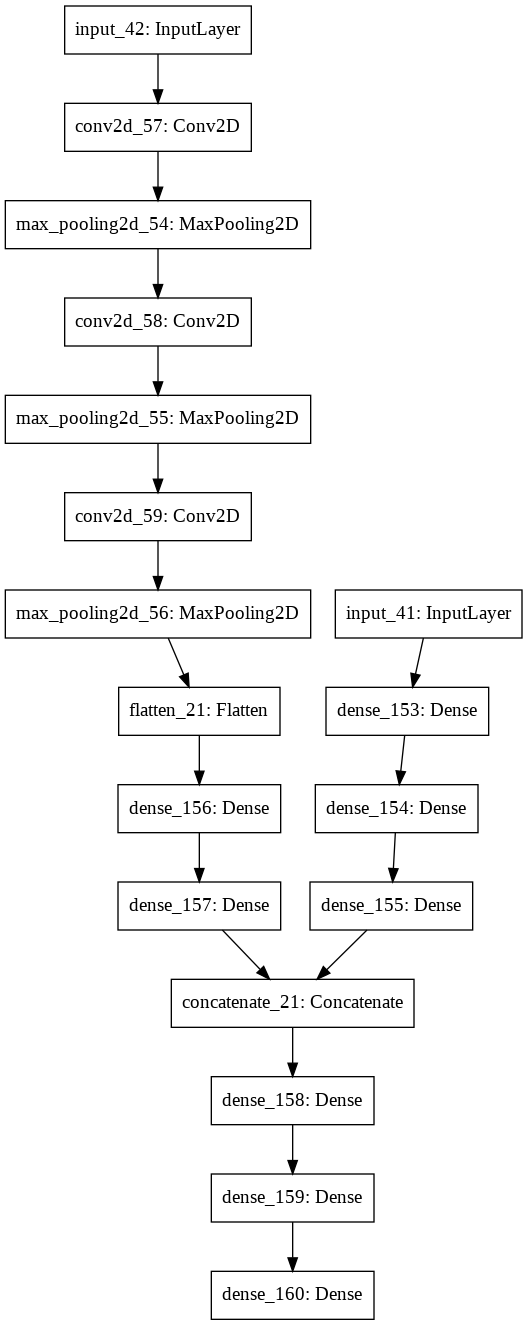

In [0]:
from keras.utils import plot_model

# Fully Connected Neural Network
input_nn = Input(shape=(44,))
output_1 = Dense(64, activation='relu')(input_nn)
output_2 = Dense(32, activation='relu')(output_1)
#output_3 = Dense(32, activation='relu')(output_2)
#output_4 = Dense(16, activation='relu')(output_3)
output_nn = Dense(5)(output_2)

# This creates a model that includes
# the Input layer and three Dense layers
#model_NN = Model(inputs=input_txt, outputs=output_NN)




#CNN
input_cnn = Input(shape=(128,128,3))
conv1 = Conv2D(64, kernel_size=4, activation='relu')(input_cnn)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
conv2 = Conv2D(32, kernel_size=3, activation='relu')(pool1)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
conv3 = Conv2D(32, kernel_size=2, activation='relu')(pool2)
pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
flat = Flatten()(pool3)

hidden = Dense(10, activation='relu')(flat)
output_cnn = Dense(1)(hidden)



#Combined Output that will be INPUT for our final layer
combinedInput = concatenate([output_nn, output_cnn])

# Final Layer input = combinedInput
x = Dense(8, activation="relu")(combinedInput)
x = Dense(4, activation="relu")(x)
#x = Dense(2, activation="relu")(x)
x = Dense(1, activation="linear")(x)

# Model_combined 
model_combined = Model(inputs=[input_nn, input_cnn], outputs=x)

print(model_combined.summary())
plot_model(model_combined, to_file='combined_model.png')



In [0]:
#Compile the model_combined
model_combined.compile(loss="mean_squared_error", optimizer='adam')


monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
checkpointer = ModelCheckpoint(filepath="best_weights_cnn_relu.hdf5", verbose=0, save_best_only=True) # save best model
model_combined.fit([X_train_txt,X_train_images], y_train, validation_data= ([X_test_txt, X_test_images], y_test), callbacks=[monitor,checkpointer],verbose=2,epochs=800)
model_combined.load_weights('best_weights_cnn_relu.hdf5') # load weights from best model


Train on 362 samples, validate on 91 samples
Epoch 1/800
 - 6s - loss: 252180783330.2983 - val_loss: 232144196349.1868
Epoch 2/800
 - 1s - loss: 180502724336.4420 - val_loss: 62541365157.9780
Epoch 3/800
 - 1s - loss: 78502628946.0332 - val_loss: 63005202994.6374
Epoch 4/800
 - 1s - loss: 70417050901.2155 - val_loss: 57518475151.4725
Epoch 5/800
 - 1s - loss: 57921642314.9613 - val_loss: 56781130155.6044
Epoch 6/800
 - 1s - loss: 56679040786.3867 - val_loss: 56540940085.4505
Epoch 7/800
 - 1s - loss: 55840987215.2044 - val_loss: 56059028221.1868
Epoch 8/800
 - 1s - loss: 55732687006.4088 - val_loss: 56023373216.3516
Epoch 9/800
 - 1s - loss: 55975262852.9503 - val_loss: 55781993325.7143
Epoch 10/800
 - 1s - loss: 55651024036.0663 - val_loss: 55704507133.1868
Epoch 11/800
 - 1s - loss: 55973008265.1934 - val_loss: 55545162650.7253
Epoch 12/800
 - 1s - loss: 55761702459.4033 - val_loss: 55791634679.5604
Epoch 13/800
 - 1s - loss: 55879644697.4586 - val_loss: 55981334708.0440
Epoch 14/800

Score (RMSE): 153641.58012612603


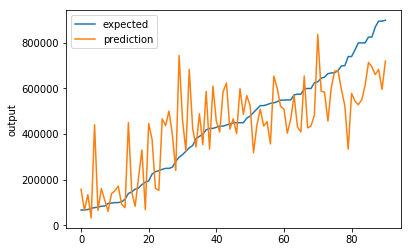

In [0]:

pred = model_combined.predict([X_test_txt, X_test_images])

rmse = np.sqrt(metrics.mean_squared_error(y_test, pred))
print("Score (RMSE): {}".format(rmse))

#regression lift Chart
chart_regression(pred.flatten(),y_test, sort=True)